In [ ]:
import pandas as pd

# === 1. Especificar manualmente los archivos de predicciones parciales ===
archivos = [
    "prediccion_feb2020_top40+hp.csv",
    "prediccion_feb2020_top30+hp.csv",
    "prediccion_feb2020_top20+hp.csv",
     "prediccion_feb2020_top100+hp.csv",
]
print("📂 Archivos seleccionados:", archivos)

# === 2. Cargar y concatenar ===
dfs = []
for archivo in archivos:
    df_parcial = pd.read_csv(archivo)
    
    # Buscar columna de predicción
    posibles_nombres = ["tn_predicho", "tn_pred", "predicted_tn_feb_2020"]
    nombre_valido = next((col for col in posibles_nombres if col in df_parcial.columns), None)
    
    if nombre_valido is None:
        raise ValueError(f"⚠️ No se encontró ninguna columna de predicción esperada en el archivo: {archivo}")
    
    df_parcial = df_parcial[["product_id", nombre_valido]].rename(columns={nombre_valido: "tn_predicho"})
    df_parcial["product_id"] = df_parcial["product_id"].astype(str)
    dfs.append(df_parcial)

df_concat = pd.concat(dfs, ignore_index=True)

# === 3. Agrupar y sumar ===
df_sumado = df_concat.groupby("product_id", as_index=False).agg({"tn_predicho": "sum"})

# === 4. Estadísticas de control ===
total_registros = len(df_concat)
total_productos = len(df_sumado)
duplicados = total_registros - df_concat["product_id"].nunique()

print(f"🔢 Registros totales cargados: {total_registros}")
print(f"🏷️ Productos únicos en la suma final: {total_productos}")
print(f"⚠️ Registros con product_id duplicado antes de agrupar: {duplicados}")

# === 5. Exportar ===
df_sumado.to_csv("prediccionesfeb20nuevosJ.csv", index=False)
print("✅ Exportado 'prediccionesfeb20+hp.csv'.")
print(f"🔢 Suma total de tn_predicho: {df_sumado['tn_predicho'].sum():,.2f} tn")


📂 Archivos seleccionados: ['prediccionfeb20top50nuevoJ.csv', 'prediccionfeb20top30nuevoJ.csv', 'prediccionfeb20top20nuevoJ.csv']
🔢 Registros totales cargados: 1430
🏷️ Productos únicos en la suma final: 780
⚠️ Registros con product_id duplicado antes de agrupar: 650
✅ Exportado 'prediccionesfeb20nuevosJ.csv'.
🔢 Suma total de tn_predicho: 27,603.52 tn


In [6]:
df_90=pd.read_csv("dataset_top90_series_completas.csv", parse_dates=["periodo"])
cantidad_unicos = df_90["product_id"].nunique()
print(f"🔢 Hay {cantidad_unicos} product_id únicos en el dataset del 90% de toneladas.")


🔢 Hay 624 product_id únicos en el dataset del 90% de toneladas.


In [7]:
cantidad_pares = df_90.groupby(["product_id", "customer_id"]).ngroups
print(f"🔗 Hay {cantidad_pares} combinaciones únicas de product_id y customer_id en el dataset del 90%.")


🔗 Hay 22084 combinaciones únicas de product_id y customer_id en el dataset del 90%.


In [16]:
# === 1. Agrupar por product_id y sumar tn ===
top_productos = (
    df_90.groupby("product_id")["tn"]
    .sum()
    .sort_values(ascending=False)
    .head(83)
    .index
)

# === 2. Filtrar el dataset por esos product_id ===
df_top50 = df_90[df_90["product_id"].isin(top_productos)]

print(f"✅ Dataset filtrado: {len(df_top50)} registros correspondientes a los 50 product_id con más tn.")


✅ Dataset filtrado: 392760 registros correspondientes a los 50 product_id con más tn.


In [17]:
# Ya tenés df_top50 con los registros de los 50 product_id principales
combinaciones_unicas = df_top50[["product_id", "customer_id"]].drop_duplicates()
total_combinaciones = len(combinaciones_unicas)

print(f"🔗 Total de combinaciones únicas product_id + customer_id: {total_combinaciones}")


🔗 Total de combinaciones únicas product_id + customer_id: 10910


In [18]:
# Agrupar por par y contar cuántos registros hay por cada uno
conteo_por_par = df_top50.groupby(["product_id", "customer_id"]).size().reset_index(name="cantidad")

# Filtrar los que no tienen 36 registros
pares_incompletos = conteo_por_par[conteo_por_par["cantidad"] != 36]

# Mostrar resultados
print(f"🔍 Total de pares distintos: {len(conteo_por_par)}")
print(f"⚠️ Pares que NO tienen 36 registros: {len(pares_incompletos)}")

# Opcional: mostrar los primeros casos con problemas
print(pares_incompletos.head())


🔍 Total de pares distintos: 10910
⚠️ Pares que NO tienen 36 registros: 0
Empty DataFrame
Columns: [product_id, customer_id, cantidad]
Index: []


      periodo           tn
0  2017-01-01  18341.90080
1  2017-02-01  18415.38408
2  2017-03-01  25532.95032
3  2017-04-01  21738.99108
4  2017-05-01  25385.93618
5  2017-06-01  25005.08317
6  2017-07-01  21455.00334
7  2017-08-01  23594.95175
8  2017-09-01  29081.72186
9  2017-10-01  29311.87091
10 2017-11-01  25164.32177
11 2017-12-01  20985.92497
12 2018-01-01  16656.13843
13 2018-02-01  19258.93756
14 2018-03-01  26924.92169
15 2018-04-01  20615.06415
16 2018-05-01  23005.01977
17 2018-06-01  19670.08983
18 2018-07-01  19130.92695
19 2018-08-01  21764.12786
20 2018-09-01  19645.18043
21 2018-10-01  22092.82484
22 2018-11-01  20588.64656
23 2018-12-01  16044.91707
24 2019-01-01  17229.23082
25 2019-02-01  17402.96750
26 2019-03-01  20463.11618
27 2019-04-01  20247.57398
28 2019-05-01  19521.36712
29 2019-06-01  19476.47634
30 2019-07-01  19901.29327
31 2019-08-01  14355.71846
32 2019-09-01  20537.61053
33 2019-10-01  22199.02732
34 2019-11-01  19636.66596
35 2019-12-01  16033.74055


C:\Users\waldo\AppData\Local\Temp\ipykernel_7668\2239701011.py:18: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\waldo\miniconda3\envs\tslearn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


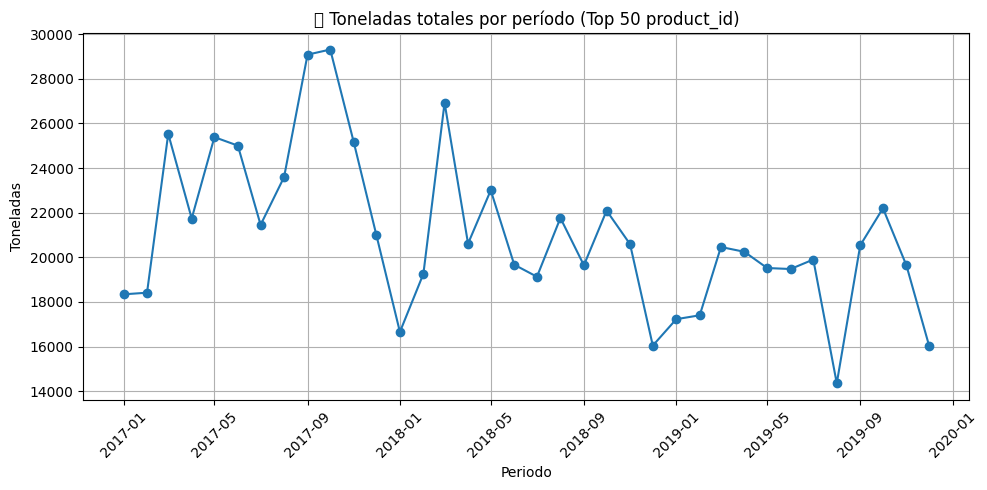

In [19]:
# Asegurate de estar trabajando con df_top50
# Agrupar por período y sumar toneladas
suma_por_periodo = df_top50.groupby("periodo")["tn"].sum().reset_index()

# Mostrar resultados
print(suma_por_periodo)

# (Opcional) Mostrar gráfica de evolución
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(suma_por_periodo["periodo"], suma_por_periodo["tn"], marker="o")
plt.title("📦 Toneladas totales por período (Top 50 product_id)")
plt.xlabel("Periodo")
plt.ylabel("Toneladas")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
# Agrupar por product_id y sumar toneladas
df=pd.read_csv("dataset_base_features.csv", parse_dates=["periodo"])
df["periodo"] = pd.to_datetime(df["periodo"])
df["customer_id"] = df["customer_id"].astype(str)
toneladas_por_producto = df.groupby("product_id")["tn"].sum().reset_index()

# Ordenar de mayor a menor según toneladas
toneladas_por_producto = toneladas_por_producto.sort_values(by="tn", ascending=False)

# Calcular el total acumulado y su proporción
toneladas_por_producto["acumulado"] = toneladas_por_producto["tn"].cumsum()
total_tn = toneladas_por_producto["tn"].sum()
toneladas_por_producto["proporcion_acumulada"] = toneladas_por_producto["acumulado"] / total_tn

# Filtrar los que representan hasta el 70%
top_70 = toneladas_por_producto[toneladas_por_producto["proporcion_acumulada"] <= 0.70]

# Mostrar resultado
print(f"📦 Para cubrir el 70% de las toneladas, se necesitan {len(top_70)} product_id.")
print(f"🔢 Representan un total de {top_70['tn'].sum():,.2f} tn sobre {total_tn:,.2f} tn totales.")


📦 Para cubrir el 70% de las toneladas, se necesitan 83 product_id.
🔢 Representan un total de 785,258.54 tn sobre 1,122,605.22 tn totales.


In [23]:
import pandas as pd

# Paso 1: Agrupar por product_id y sumar tn
agrupado = df.groupby("product_id", as_index=False)["tn"].sum()

# Paso 2: Ordenar de mayor a menor y calcular proporción acumulada
agrupado = agrupado.sort_values(by="tn", ascending=False)
agrupado["acumulado"] = agrupado["tn"].cumsum()
total_tn = agrupado["tn"].sum()
agrupado["proporcion"] = agrupado["acumulado"] / total_tn

# Paso 3: Asignar bloque según proporción acumulada
def asignar_bloque(p):
    if p <= 0.40:
        return "bloque_40"
    elif p <= 0.70:
        return "bloque_30"
    elif p <= 0.90:
        return "bloque_20"
    else:
        return "bloque_10"

agrupado["bloque"] = agrupado["proporcion"].apply(asignar_bloque)

# Paso 4: Filtrar df original por cada bloque
productos_40 = agrupado[agrupado["bloque"] == "bloque_40"]["product_id"]
productos_30 = agrupado[agrupado["bloque"] == "bloque_30"]["product_id"]
productos_20 = agrupado[agrupado["bloque"] == "bloque_20"]["product_id"]
productos_10 = agrupado[agrupado["bloque"] == "bloque_10"]["product_id"]

df_40 = df[df["product_id"].isin(productos_40)]
df_30 = df[df["product_id"].isin(productos_30)]
df_20 = df[df["product_id"].isin(productos_20)]
df_10 = df[df["product_id"].isin(productos_10)]

# Paso 5: Resultados de control
print(f"🟢 df_40: {df_40['tn'].sum():,.2f} tn")
print(f"🔵 df_30: {df_30['tn'].sum():,.2f} tn")
print(f"🟠 df_20: {df_20['tn'].sum():,.2f} tn")
print(f"🔴 df_10: {df_10['tn'].sum():,.2f} tn")
print(f"⚖️ Total control: {df_40['tn'].sum() + df_30['tn'].sum() + df_20['tn'].sum() + df_10['tn'].sum():,.2f} tn")


🟢 df_40: 446,401.95 tn
🔵 df_30: 338,856.59 tn
🟠 df_20: 224,497.10 tn
🔴 df_10: 112,849.58 tn
⚖️ Total control: 1,122,605.22 tn


In [24]:
print(f"🟢 df_40: {df_40['product_id'].nunique()} productos")
print(f"🔵 df_30: {df_30['product_id'].nunique()} productos")
print(f"🟠 df_20: {df_20['product_id'].nunique()} productos")
print(f"🔴 df_10: {df_10['product_id'].nunique()} productos")


🟢 df_40: 23 productos
🔵 df_30: 60 productos
🟠 df_20: 141 productos
🔴 df_10: 556 productos


In [25]:
df_40.to_csv("top_40.csv", index=False)
df_30.to_csv("top_30.csv", index=False)
df_20.to_csv("top_20.csv", index=False)
df_10.to_csv("top_10.csv", index=False)

print("✅ Archivos exportados correctamente:")
print("📁 ventas_top_40porc.csv")
print("📁 ventas_sig_30porc.csv")
print("📁 ventas_sig_20porc.csv")
print("📁 ventas_rest_10porc.csv")


✅ Archivos exportados correctamente:
📁 ventas_top_40porc.csv
📁 ventas_sig_30porc.csv
📁 ventas_sig_20porc.csv
📁 ventas_rest_10porc.csv


In [5]:
import pandas as pd 
df40=pd.read_csv("top_40.csv", parse_dates=["periodo"])

In [6]:
df40

,customer_id,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,...,is_max_3,is_max_6,is_max_12,is_max_24,is_max_36,año,mes,cuatrimestre,mes_absoluto,cos_mes
0,10004,20001,2017-01-01,0.0,9.0,184.72927,184.72927,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
1,10003,20001,2017-01-01,0.0,17.0,143.49426,143.49426,0.00000,1,10,...,0,0,0,0,0,2017,1,1,0,0.866025
2,10002,20001,2017-01-01,0.0,17.0,38.68301,35.72806,0.00000,1,10,...,0,0,0,0,0,2017,1,1,0,0.866025
3,10001,20001,2017-01-01,0.0,11.0,99.43861,99.43861,0.00000,1,10,...,0,0,0,0,0,2017,1,1,0,0.866025
4,10084,20001,2017-01-01,0.0,1.0,0.22386,0.22386,0.00000,1,10,...,0,0,0,0,0,2017,1,1,0,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360751,10573,20024,2019-12-01,0.0,0.0,0.00000,0.00000,2.65356,1,10,...,1,1,0,0,0,2019,12,3,35,1.000000
360752,10579,20024,2019-12-01,0.0,0.0,0.00000,0.00000,2.65356,1,10,...,1,1,0,0,0,2019,12,3,35,1.000000
360753,10584,20024,2019-12-01,0.0,0.0,0.00000,0.00000,2.65356,1,10,...,1,1,0,0,0,2019,12,3,35,1.000000
360754,10503,20024,2019-12-01,0.0,0.0,0.00000,0.00000,2.65356,1,10,...,1,1,0,0,0,2019,12,3,35,1.000000


In [2]:
import pandas as pd
df30=pd.read_csv("top_30.csv", parse_dates=["periodo"])

In [3]:
df30

,customer_id,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,...,is_max_3,is_max_6,is_max_12,is_max_24,is_max_36,año,mes,cuatrimestre,mes_absoluto,cos_mes
0,10028,20023,2017-01-01,0.0,1.0,0.5460,0.5460,0.00000,0,0,...,1,1,1,1,1,2017,1,1,0,0.866025
1,10027,20023,2017-01-01,0.0,1.0,0.6825,0.6825,0.00000,0,0,...,1,1,1,1,1,2017,1,1,0,0.866025
2,10026,20023,2017-01-01,0.0,3.0,1.6380,1.6380,0.00000,0,0,...,1,1,1,1,1,2017,1,1,0,0.866025
3,10025,20023,2017-01-01,0.0,2.0,3.8220,3.8220,0.00000,0,0,...,1,1,1,1,1,2017,1,1,0,0.866025
4,10024,20023,2017-01-01,0.0,0.0,0.0000,0.0000,0.00000,0,0,...,0,0,0,0,0,2017,1,1,0,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905827,10500,20102,2019-12-01,0.0,0.0,0.0000,0.0000,71.87267,1,10,...,1,1,1,0,0,2019,12,3,35,1.000000
905828,10525,20102,2019-12-01,0.0,0.0,0.0000,0.0000,71.87267,1,10,...,1,1,1,0,0,2019,12,3,35,1.000000
905829,10594,20102,2019-12-01,0.0,0.0,0.0000,0.0000,71.87267,1,10,...,1,1,1,0,0,2019,12,3,35,1.000000
905830,10464,20102,2019-12-01,0.0,0.0,0.0000,0.0000,71.87267,1,10,...,1,1,1,0,0,2019,12,3,35,1.000000


In [7]:
df20=pd.read_csv("top_20.csv", parse_dates=["periodo"])

In [8]:
df20 

,customer_id,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,...,is_max_3,is_max_6,is_max_12,is_max_24,is_max_36,año,mes,cuatrimestre,mes_absoluto,cos_mes
0,10010,20085,2017-01-01,0.0,0.0,0.0,0.0,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
1,10009,20085,2017-01-01,0.0,0.0,0.0,0.0,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
2,10111,20085,2017-01-01,0.0,0.0,0.0,0.0,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
3,10110,20085,2017-01-01,0.0,0.0,0.0,0.0,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
4,10109,20085,2017-01-01,0.0,0.0,0.0,0.0,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935031,10549,20322,2019-12-01,0.0,0.0,0.0,0.0,15.48609,0,0,...,1,1,0,0,0,2019,12,3,35,1.000000
1935032,10552,20322,2019-12-01,0.0,0.0,0.0,0.0,15.48609,0,0,...,1,1,1,0,0,2019,12,3,35,1.000000
1935033,10556,20322,2019-12-01,0.0,0.0,0.0,0.0,15.48609,0,0,...,1,1,1,0,0,2019,12,3,35,1.000000
1935034,10378,20322,2019-12-01,0.0,0.0,0.0,0.0,15.48609,0,0,...,1,1,1,0,0,2019,12,3,35,1.000000


In [9]:
df10=pd.read_csv("top_10.csv", parse_dates=["periodo"])

In [10]:
df10 

,customer_id,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,...,is_max_3,is_max_6,is_max_12,is_max_24,is_max_36,año,mes,cuatrimestre,mes_absoluto,cos_mes
0,10032,20210,2017-01-01,0.0,0.0,0.00000,0.00000,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
1,10035,20210,2017-01-01,0.0,0.0,0.00000,0.00000,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
2,10036,20210,2017-01-01,0.0,0.0,0.00000,0.00000,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
3,10037,20210,2017-01-01,0.0,0.0,0.00000,0.00000,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
4,10152,20210,2017-01-01,0.0,0.0,0.00000,0.00000,0.00000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259351,10159,21276,2019-12-01,0.0,0.0,0.00000,0.00000,1.05592,2,6,...,0,0,0,0,0,2019,12,3,35,1.000000
6259352,10101,21276,2019-12-01,0.0,0.0,0.00000,0.00000,1.05592,2,6,...,1,0,0,0,0,2019,12,3,35,1.000000
6259353,10154,21276,2019-12-01,0.0,0.0,0.00000,0.00000,1.05592,2,6,...,1,0,0,0,0,2019,12,3,35,1.000000
6259354,10052,21276,2019-12-01,0.0,1.0,0.00594,0.00594,1.05592,2,6,...,1,1,1,0,0,2019,12,3,35,1.000000


In [5]:
import pandas as pd

# Lista de archivos originales
archivos = [
    "top_40.csv",
    "top_30.csv",
    "top_20.csv",
    "top_10.csv"
]

# Procesar cada archivo
for archivo in archivos:
    print(f"🛠️ Procesando: {archivo}")
    
    # 1. Cargar el dataset
    df = pd.read_csv(archivo)
    
    # 2. Reemplazar todos los NaN por 0
    df.fillna(0, inplace=True)
    # 2. Detectar columnas que contengan 'lag_' o 'delta_'
    #columnas_a_corregir = [col for col in df.columns if 'lag_' in col or 'delta_' in col]
    
    # 3. Rellenar NaN con 0 en esas columnas
    #df[columnas_a_corregir] = df[columnas_a_corregir].fillna(0)
    
    # 4. Exportar con nuevo nombre
    archivo_corr = archivo.replace(".csv", "_corr.csv")
    df.to_csv(archivo_corr, index=False)
    
    print(f"✅ Guardado: {archivo_corr} (NaN reemplazados por 0 en todo el dataset)")


🛠️ Procesando: top_40.csv
✅ Guardado: top_40_corr.csv (NaN reemplazados por 0 en todo el dataset)
🛠️ Procesando: top_30.csv
✅ Guardado: top_30_corr.csv (NaN reemplazados por 0 en todo el dataset)
🛠️ Procesando: top_20.csv
✅ Guardado: top_20_corr.csv (NaN reemplazados por 0 en todo el dataset)
🛠️ Procesando: top_10.csv
✅ Guardado: top_10_corr.csv (NaN reemplazados por 0 en todo el dataset)


In [7]:
import pandas as pd

# === 1. Cargar el dataset ===
df = pd.read_csv("top_10_corr.csv")

# === 2. Ver cuántos NaN hay por columna, sin truncar ===
na_series = df.isna().sum()
print(na_series.to_string())  # Esto evita que se corte la salida aunque haya muchas columnas


customer_id              0
product_id               0
periodo                  0
plan_precios_cuidados    0
cust_request_qty         0
cust_request_tn          0
tn                       0
stock_final              0
cat1                     0
cat2                     0
cat3                     0
brand                    0
sku_size                 0
tn_norm                  0
cust_request_tn_norm     0
lag_1                    0
lag_2                    0
lag_3                    0
lag_4                    0
lag_5                    0
lag_6                    0
lag_7                    0
lag_8                    0
lag_9                    0
lag_10                   0
lag_11                   0
lag_12                   0
lag_13                   0
lag_14                   0
lag_15                   0
lag_16                   0
lag_17                   0
lag_18                   0
lag_19                   0
lag_20                   0
lag_21                   0
lag_22                   0
l